In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [2]:
df = pd.read_csv('17_tcp_captured_pac.csv')
df2 = pd.read_csv('17_udp_captured_pac.csv')
df3 = pd.read_csv('17_Normal_captured_pac.csv')
df4 = pd.read_csv('17_rtsp_captured_pac.csv')

In [3]:
df = df.fillna(0)
df2 = df2.fillna(0)
df3 = df3.fillna(0)
df4 = df4.fillna(0)

In [4]:
df = df.drop(['ip.src','ip.dst','ipv6.src','ipv6.dst','eth.src','eth.dst','ip.id','tcp.flags','ipv6.dst','ip.ttl','icmp.length','http.request.method','http.response.code','http.content_length'],axis = 1)
df = pd.get_dummies(df)
df["attack_type"] = "TCP_flood"
df

,ip.proto,ip.hdr_len,ip.len,ip.flags.df,tcp.stream,tcp.time_delta,tcp.time_relative,tcp.analysis.initial_rtt,tcp.window_size_value,tcp.hdr_len,tcp.len,tcp.srcport,tcp.dstport,udp.srcport,udp.dstport,udp.stream,udp.length,ip.ttl.1,attack_type
0,6,20,369,0,0,0.000000,0.000000,0.000000,14392,20,329,9020,51621,0.0,0.0,0.0,0.0,255,TCP_flood
1,6,20,369,0,0,0.000000,0.000000,0.000000,14392,20,329,9020,51621,0.0,0.0,0.0,0.0,255,TCP_flood
2,6,20,52,1,1,0.000000,0.000000,0.000000,64240,32,0,60516,80,0.0,0.0,0.0,0.0,128,TCP_flood
3,6,20,52,1,1,0.000000,0.000000,0.000000,64240,32,0,60516,80,0.0,0.0,0.0,0.0,128,TCP_flood
4,6,20,40,0,1,0.000041,0.000041,0.000041,14600,20,0,80,60516,0.0,0.0,0.0,0.0,255,TCP_flood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24655,6,20,1192,0,0,0.000000,4.261863,0.000000,14392,20,1152,9020,51621,0.0,0.0,0.0,0.0,255,TCP_flood
24656,6,20,1192,0,0,0.000225,4.262088,0.000000,14392,20,1152,9020,51621,0.0,0.0,0.0,0.0,255,TCP_flood
24657,6,20,1192,0,0,0.000000,4.262088,0.000000,14392,20,1152,9020,51621,0.0,0.0,0.0,0.0,255,TCP_flood
24658,6,20,1192,0,0,0.000000,4.262088,0.000000,14392,20,1152,9020,51621,0.0,0.0,0.0,0.0,255,TCP_flood


In [5]:
df2 = df2.drop(['ip.src','ip.dst','ipv6.src','ipv6.dst','eth.src','eth.dst','ip.id','tcp.flags','ipv6.dst','ip.ttl','icmp.length','http.request.method','http.response.code','http.content_length'],axis = 1)
df2 = pd.get_dummies(df2)
df2["attack_type"] = "Udp_flood"
df2

,ip.proto,ip.hdr_len,ip.len,ip.flags.df,tcp.stream,tcp.time_delta,tcp.time_relative,tcp.analysis.initial_rtt,tcp.window_size_value,tcp.hdr_len,tcp.len,tcp.srcport,tcp.dstport,udp.srcport,udp.dstport,udp.stream,udp.length,ip.ttl.1,attack_type
0,17,20,28,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62339,80,0,8,63,Udp_flood
1,17,20,28,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62339,80,0,8,63,Udp_flood
2,17,20,28,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62340,80,1,8,63,Udp_flood
3,17,20,28,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62340,80,1,8,63,Udp_flood
4,17,20,28,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62341,80,2,8,63,Udp_flood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28547,17,20,28,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62215,80,14270,8,63,Udp_flood
28548,17,20,28,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62216,80,14271,8,63,Udp_flood
28549,17,20,28,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62216,80,14271,8,63,Udp_flood
28550,17,20,165,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64006,1900,14272,145,4,Udp_flood


In [6]:
df3 = df3.drop(['ip.src','ip.dst','ipv6.src','ipv6.dst','eth.src','eth.dst','ip.id','tcp.flags','ipv6.dst','ip.ttl','icmp.length','http.request.method','http.response.code','http.content_length'],axis = 1)
df3 = pd.get_dummies(df3)
df3["attack_type"] = "Normal_traffic"
df3

,ip.proto,ip.hdr_len,ip.len,ip.flags.df,tcp.stream,tcp.time_delta,tcp.time_relative,tcp.analysis.initial_rtt,tcp.window_size_value,tcp.hdr_len,tcp.len,tcp.srcport,tcp.dstport,udp.srcport,udp.dstport,udp.stream,udp.length,ip.ttl.1,attack_type
0,6.0,20.0,1192.0,0.0,0.0,0.000000,0.000000,0.0,14392.0,20.0,1152.0,9020.0,51621.0,0.0,0.0,0.0,0.0,255.0,Normal_traffic
1,6.0,20.0,1192.0,0.0,0.0,0.000080,0.000080,0.0,14392.0,20.0,1152.0,9020.0,51621.0,0.0,0.0,0.0,0.0,255.0,Normal_traffic
2,6.0,20.0,1192.0,0.0,0.0,0.000113,0.000193,0.0,14392.0,20.0,1152.0,9020.0,51621.0,0.0,0.0,0.0,0.0,255.0,Normal_traffic
3,6.0,20.0,1192.0,0.0,0.0,0.000000,0.000193,0.0,14392.0,20.0,1152.0,9020.0,51621.0,0.0,0.0,0.0,0.0,255.0,Normal_traffic
4,6.0,20.0,40.0,1.0,0.0,0.008028,0.008221,0.0,65535.0,20.0,0.0,51621.0,9020.0,0.0,0.0,0.0,0.0,128.0,Normal_traffic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9427,6.0,20.0,1192.0,0.0,0.0,0.000000,30.410259,0.0,14392.0,20.0,1152.0,9020.0,51621.0,0.0,0.0,0.0,0.0,255.0,Normal_traffic
9428,6.0,20.0,1192.0,0.0,0.0,0.000000,30.410259,0.0,14392.0,20.0,1152.0,9020.0,51621.0,0.0,0.0,0.0,0.0,255.0,Normal_traffic
9429,6.0,20.0,1192.0,0.0,0.0,0.000000,30.410259,0.0,14392.0,20.0,1152.0,9020.0,51621.0,0.0,0.0,0.0,0.0,255.0,Normal_traffic
9430,6.0,20.0,1192.0,0.0,0.0,0.000105,30.410364,0.0,14392.0,20.0,1152.0,9020.0,51621.0,0.0,0.0,0.0,0.0,255.0,Normal_traffic


In [7]:
df4 = df4.drop(['ip.src','ip.dst','ipv6.src','ipv6.dst','eth.src','eth.dst','ip.id','tcp.flags','ipv6.dst','ip.ttl','icmp.length','http.request.method','http.response.code','http.content_length'],axis = 1)
df4 = pd.get_dummies(df4)
df4["attack_type"] = "Brute_force"
df4

,ip.proto,ip.hdr_len,ip.len,ip.flags.df,tcp.stream,tcp.time_delta,tcp.time_relative,tcp.analysis.initial_rtt,tcp.window_size_value,tcp.hdr_len,tcp.len,tcp.srcport,tcp.dstport,udp.srcport,udp.dstport,udp.stream,udp.length,ip.ttl.1,attack_type
0,6,20,266,0,0,0.000000,0.000000,0.000000,14533,20,226,554,54409,0.0,0.0,0.0,0.0,255,Brute_force
1,6,20,266,0,0,0.000000,0.000000,0.000000,14533,20,226,554,54409,0.0,0.0,0.0,0.0,255,Brute_force
2,6,20,40,1,0,0.007941,0.007941,0.000000,64014,20,0,54409,554,0.0,0.0,0.0,0.0,128,Brute_force
3,6,20,40,1,0,0.000000,0.007941,0.000000,64014,20,0,54409,554,0.0,0.0,0.0,0.0,128,Brute_force
4,6,20,40,0,0,0.000145,0.008086,0.000000,14532,20,0,554,54409,0.0,0.0,0.0,0.0,255,Brute_force
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35919,6,20,40,1,1751,0.000000,1.059051,0.000772,64014,20,0,56148,554,0.0,0.0,0.0,0.0,128,Brute_force
35920,6,20,40,0,1752,0.018008,0.980840,0.000000,14484,20,0,554,56149,0.0,0.0,0.0,0.0,255,Brute_force
35921,6,20,40,0,1752,0.000000,0.980840,0.000566,14484,20,0,554,56149,0.0,0.0,0.0,0.0,255,Brute_force
35922,6,20,40,1,1752,0.000123,0.980963,0.000566,64014,20,0,56149,554,0.0,0.0,0.0,0.0,128,Brute_force


In [8]:
frames = [df,df2,df3,df4]

### concatenating data
result = pd.concat(frames)

##display
result

,ip.proto,ip.hdr_len,ip.len,ip.flags.df,tcp.stream,tcp.time_delta,tcp.time_relative,tcp.analysis.initial_rtt,tcp.window_size_value,tcp.hdr_len,tcp.len,tcp.srcport,tcp.dstport,udp.srcport,udp.dstport,udp.stream,udp.length,ip.ttl.1,attack_type
0,6.0,20.0,369.0,0.0,0.0,0.000000,0.000000,0.000000,14392.0,20.0,329.0,9020.0,51621.0,0.0,0.0,0.0,0.0,255.0,TCP_flood
1,6.0,20.0,369.0,0.0,0.0,0.000000,0.000000,0.000000,14392.0,20.0,329.0,9020.0,51621.0,0.0,0.0,0.0,0.0,255.0,TCP_flood
2,6.0,20.0,52.0,1.0,1.0,0.000000,0.000000,0.000000,64240.0,32.0,0.0,60516.0,80.0,0.0,0.0,0.0,0.0,128.0,TCP_flood
3,6.0,20.0,52.0,1.0,1.0,0.000000,0.000000,0.000000,64240.0,32.0,0.0,60516.0,80.0,0.0,0.0,0.0,0.0,128.0,TCP_flood
4,6.0,20.0,40.0,0.0,1.0,0.000041,0.000041,0.000041,14600.0,20.0,0.0,80.0,60516.0,0.0,0.0,0.0,0.0,255.0,TCP_flood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35919,6.0,20.0,40.0,1.0,1751.0,0.000000,1.059051,0.000772,64014.0,20.0,0.0,56148.0,554.0,0.0,0.0,0.0,0.0,128.0,Brute_force
35920,6.0,20.0,40.0,0.0,1752.0,0.018008,0.980840,0.000000,14484.0,20.0,0.0,554.0,56149.0,0.0,0.0,0.0,0.0,255.0,Brute_force
35921,6.0,20.0,40.0,0.0,1752.0,0.000000,0.980840,0.000566,14484.0,20.0,0.0,554.0,56149.0,0.0,0.0,0.0,0.0,255.0,Brute_force
35922,6.0,20.0,40.0,1.0,1752.0,0.000123,0.980963,0.000566,64014.0,20.0,0.0,56149.0,554.0,0.0,0.0,0.0,0.0,128.0,Brute_force


In [9]:
#target = corr_matrix['attack_type'].iloc[:-1].sort_values().plot(kind = 'bar')
#print(target)
#corr_matrix['attack_type'].sort_values()
y = result['attack_type']
y

0          TCP_flood
1          TCP_flood
2          TCP_flood
3          TCP_flood
4          TCP_flood
            ...     
35919    Brute_force
35920    Brute_force
35921    Brute_force
35922    Brute_force
35923    Brute_force
Name: attack_type, Length: 98568, dtype: object

In [10]:
### dropping type because it will be our label that we want to predict 
X = result.drop("attack_type",axis=1)

### display
X

,ip.proto,ip.hdr_len,ip.len,ip.flags.df,tcp.stream,tcp.time_delta,tcp.time_relative,tcp.analysis.initial_rtt,tcp.window_size_value,tcp.hdr_len,tcp.len,tcp.srcport,tcp.dstport,udp.srcport,udp.dstport,udp.stream,udp.length,ip.ttl.1
0,6.0,20.0,369.0,0.0,0.0,0.000000,0.000000,0.000000,14392.0,20.0,329.0,9020.0,51621.0,0.0,0.0,0.0,0.0,255.0
1,6.0,20.0,369.0,0.0,0.0,0.000000,0.000000,0.000000,14392.0,20.0,329.0,9020.0,51621.0,0.0,0.0,0.0,0.0,255.0
2,6.0,20.0,52.0,1.0,1.0,0.000000,0.000000,0.000000,64240.0,32.0,0.0,60516.0,80.0,0.0,0.0,0.0,0.0,128.0
3,6.0,20.0,52.0,1.0,1.0,0.000000,0.000000,0.000000,64240.0,32.0,0.0,60516.0,80.0,0.0,0.0,0.0,0.0,128.0
4,6.0,20.0,40.0,0.0,1.0,0.000041,0.000041,0.000041,14600.0,20.0,0.0,80.0,60516.0,0.0,0.0,0.0,0.0,255.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35919,6.0,20.0,40.0,1.0,1751.0,0.000000,1.059051,0.000772,64014.0,20.0,0.0,56148.0,554.0,0.0,0.0,0.0,0.0,128.0
35920,6.0,20.0,40.0,0.0,1752.0,0.018008,0.980840,0.000000,14484.0,20.0,0.0,554.0,56149.0,0.0,0.0,0.0,0.0,255.0
35921,6.0,20.0,40.0,0.0,1752.0,0.000000,0.980840,0.000566,14484.0,20.0,0.0,554.0,56149.0,0.0,0.0,0.0,0.0,255.0
35922,6.0,20.0,40.0,1.0,1752.0,0.000123,0.980963,0.000566,64014.0,20.0,0.0,56149.0,554.0,0.0,0.0,0.0,0.0,128.0


In [11]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import time

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
logreg_model = LogisticRegression(random_state=42)

# Train the model
start_time = time.time()
logreg_model.fit(X_train, y_train)
training_time_logreg = time.time() - start_time
print(f"Logistic Regression Training Time: {training_time_logreg} seconds")


# Make predictions on the test set
start_time = time.time()
y_pred = logreg_model.predict(X_test)
testing_time_logreg = time.time() - start_time
print(f"Logistic Regression Testing Time: {testing_time_logreg} seconds")


# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Display classification report
print("Classification Report:\n", classification_report(y_test, y_pred))


C:\Users\Wellcome\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Training Time: 10.652578592300415 seconds
Logistic Regression Testing Time: 0.008036136627197266 seconds
Accuracy: 0.9210713198742011
Classification Report:
                 precision    recall  f1-score   support

   Brute_force       0.88      0.97      0.92      7073
Normal_traffic       0.76      0.60      0.67      1928
     TCP_flood       0.95      0.88      0.91      4952
     Udp_flood       1.00      1.00      1.00      5761

      accuracy                           0.92     19714
     macro avg       0.90      0.86      0.88     19714
  weighted avg       0.92      0.92      0.92     19714



In [12]:
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix,accuracy_score

<AxesSubplot:>

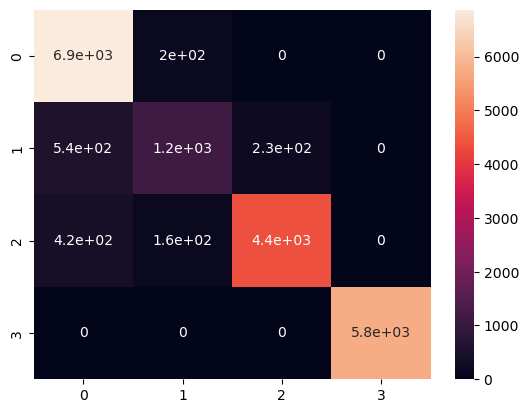

In [13]:
conf = confusion_matrix(y_test,y_pred)
sns.heatmap(conf,annot=True)

In [14]:
with open('un_balanced_model_LG.pkl','wb') as f:
    pickle.dump(logreg_model,f)